In [23]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from random import uniform, randrange

air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
SiO2_L = ml.open_material('SiO2_LENS', 'Sellmeier')
SiN_L = ml.open_material('SiN_LENS', 'Sellmeier')
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_LENS', 'Material')

ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])

wl = np.linspace(400, 700, 301)

hypo_bri = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0]-th[4], th[1], th[2], th[3], th[4], th[5], th[6], th[7], None]
).reflectance(wl)

hypo_dia = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[6], th[7], None]
).reflectance(wl)

hypo_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[6], th[7], None]
).reflectance(wl)

f7 = [1709.56382882,13.49562472,25.06644048,20.00613518,35.05068117,12.78743588]

In [3]:
margin = []

In [4]:
for i in range(0,1000):
    th = [
        randrange(1540, 1880, 10),
        uniform(8.5, 18.5),
        uniform(20.1, 30.1),
        uniform(15,25),
        randrange(1080,1320,10),
        uniform(50,60),
        uniform(30.1,40.1),
        uniform(7.8,17.8)
    ]
    R_bri = hypo_bri(th)
    R_dia = hypo_dia(th)
    R_tra = hypo_tra(th)
    delta_d_b = np.mean(abs(R_bri-R_dia))
    delta_d_t = np.mean(abs(R_tra-R_dia))
    margin.append({'Rb':delta_d_b, 'Rt':delta_d_t, 'th':th})

In [12]:
Rb = []
Rt = []
th = []
for i in margin:
    Rb.append(i['Rb'])
    Rt.append(i['Rt'])
    th.append(i['th'])

In [27]:
c = np.zeros(12)
for i in Rt:
    x = 0.0054
    if i < x-0.01:
        c[0] = c[0]+1
    elif i < x-0.008:    
        c[1] = c[1]+1
    elif i < x-0.006:
        c[2] = c[2]+1
    elif i < x-0.004:
        c[3] = c[3]+1
    elif i < x-0.002:
        c[4] = c[4]+1
    elif i < x:
        c[5] = c[5]+1
    elif i < x+0.002:
        c[6] = c[6]+1 
    elif i < x+0.004:
        c[7] = c[7]+1 
    elif i < x+0.006:
        c[8] = c[8]+1 
    elif i < x+0.008:
        c[9] = c[9]+1 
    elif i < x+0.01:
        c[10] = c[10]+1
    else:
        c[11] = c[11]+1

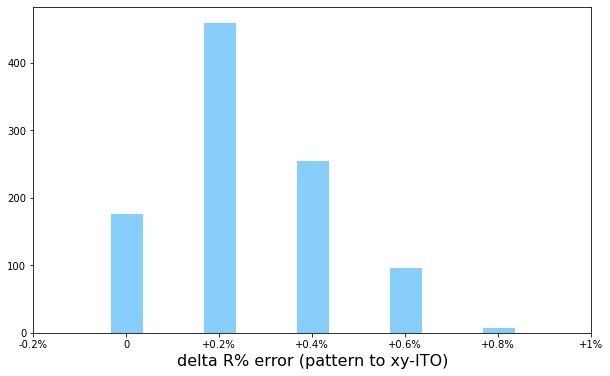

[  0.   0.   0.   0.   0. 177. 460. 256.  98.   9.   0.   0.]


In [40]:
plt.figure( figsize=(10, 6))
plt.bar(
    ['<-1%','-0.8%','-0.6%','-0.4%','-0.2%','0','+0.2%','+0.4%','+0.6%','+0.8%','+1%','>1%'], 
    c, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white',
)
plt.xlim(4,10)
plt.xlabel('delta R% error (pattern to xy-ITO)', fontsize = 16)
#plt.savefig('LENS_rev1_margin.png')
plt.show()

print(c)